In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mush = pd.read_csv('dataset/mushrooms.csv')
mush = mush.astype('category')
mush.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [3]:
# Menggunakan LabelEncoder untuk mengubah kategori values menjadi ordinal
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in mush.columns:
    mush[column] = labelencoder.fit_transform(mush[column])

mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [4]:
mush = mush.drop(["veil-type"],axis=1)

In [5]:
y = mush['class']
X = mush.drop('class', axis=1)

In [6]:
from sklearn.model_selection import train_test_split
# "class" column as numpy array.
y = mush["class"].values
# All data except "class" column.
X = mush.drop(["class"], axis=1).values
# Split data for train and test.
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=40,test_size=0.1)

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=6, random_state=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=3)

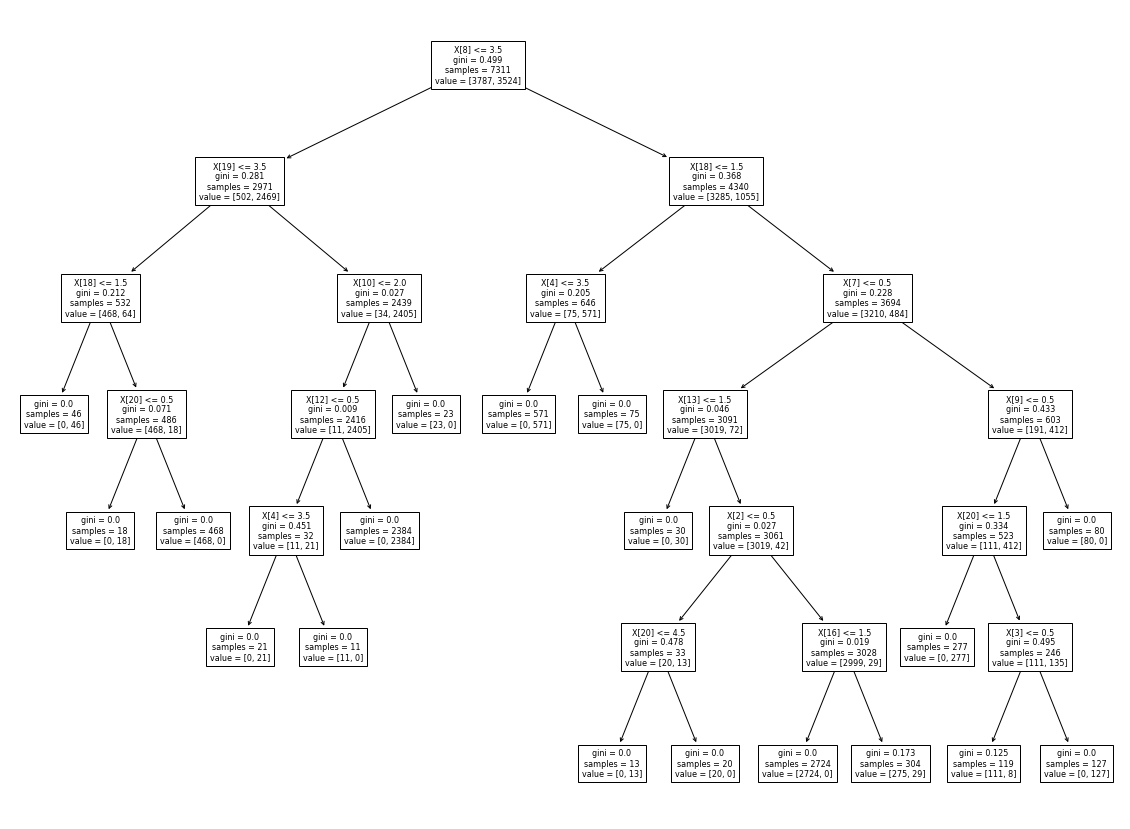

In [8]:
from sklearn import tree

plt.figure(figsize=(20,15))
tree.plot_tree(dt.fit(X_train, y_train), fontsize=8)
plt.show()

In [9]:
y_pred = dt.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,

In [10]:
def inverse_label(e):
    return 'p' if e == 1 else 'e'

res_label = np.vectorize(inverse_label)
pred_label = res_label(y_pred[0:5])
print(pred_label)

['e' 'p' 'p' 'p' 'p']


In [15]:
from sklearn.metrics import accuracy_score

# menggunakan dt_entropy untuk memprediksi test set labels
y_full_pred_gini = dt.predict(X_test)

# mengevaluasi accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_full_pred_gini)

# Print accuracy_gini
print("Accuracy achieved by using gini: ", accuracy_gini)

Accuracy achieved by using gini:  0.996309963099631
